In [1]:
# Convert Image to Polar Coords

In [2]:
import numpy as np
import scipy as sp
import scipy.ndimage
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
def plot_polar_image(data, origin=None):
    """Plots an image reprojected into polar coordinages with the origin
    at "origin" (a tuple of (x0, y0), defaults to the center of the image)"""
    polar_grid, r, theta = reproject_image_into_polar(data, origin)
    plt.figure()
    plt.imshow(polar_grid, extent=(theta.min(), theta.max(), r.max(), r.min()))
    plt.axis('auto')
    plt.ylim(plt.ylim()[::-1])
    plt.xlabel('Theta Coordinate (radians)')
    plt.ylabel('R Coordinate (pixels)')
    plt.title('Image in Polar Coordinates')

In [4]:
def index_coords(data, origin=None):
    """Creates x & y coords for the indicies in a numpy array "data".
    "origin" defaults to the center of the image. Specify origin=(0,0)
    to set the origin to the lower left corner of the image."""
    ny, nx = data.shape[:2]
    if origin is None:
        origin_x, origin_y = nx // 2, ny // 2
    else:
        origin_x, origin_y = origin
    x, y = np.meshgrid(np.arange(nx), np.arange(ny))
    x -= origin_x
    y -= origin_y
    return x, y

def cart2polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return r, theta

def polar2cart(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

In [5]:
def reproject_image_into_polar(data, origin=None):
    """Reprojects a 3D numpy array ("data") into a polar coordinate system.
    "origin" is a tuple of (x0, y0) and defaults to the center of the image."""
    ny, nx = data.shape[:2]
    if origin is None:
        origin = (nx//2, ny//2)

    # Determine that the min and max r and theta coords will be...
    x, y = index_coords(data, origin=origin)
    r, theta = cart2polar(x, y)

    # Make a regular (in polar space) grid based on the min and max r & theta
    r_i = np.linspace(r.min(), r.max(), nx)
    theta_i = np.linspace(theta.min(), theta.max(), ny)
    theta_grid, r_grid = np.meshgrid(theta_i, r_i)

    # Project the r and theta grid back into pixel coordinates
    xi, yi = polar2cart(r_grid, theta_grid)
    xi += origin[0] # We need to shift the origin back to 
    yi += origin[1] # back to the lower-left corner...
    xi, yi = xi.flatten(), yi.flatten()
    coords = np.vstack((xi, yi)) # (map_coordinates requires a 2xn array)

    # Reproject each band individually and the restack
    # (uses less memory than reprojection the 3-dimensional array in one step)
    bands = []
    for band in data.T:
        zi = sp.ndimage.map_coordinates(band, coords, order=1)
        bands.append(zi.reshape((nx, ny)))
    output = np.dstack(bands)
    return output, r_i, theta_i


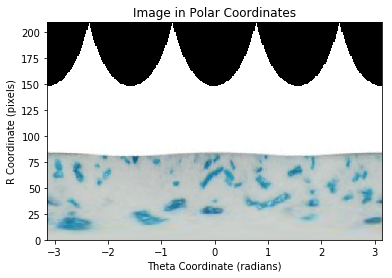

In [6]:
#im = Image.open('mri_demo.png')
im = Image.open("D:\\gitcustomers\\Pill-CBIR-Keras-CNN\\data\\test\\images\\229.jpg")
im = im.convert('RGB')
data = np.array(im)

plot_polar_image(data, origin=None)
#plot_directional_intensity(data, origin=None)

plt.show()

In [ ]:
polar_grid, r, theta = reproject_image_into_polar(data, origin)


In [ ]:
polar_grid, r, theta = reproject_image_into_polar(data, origin)